# The Spike_train class

This notebook documents the usage of the `Spike_train` class. It covers its main attributes and methods.

A `Spike_train` object can be used to represent the spike train of a single neuron. A spike train is simply a series (1D array) containing the time at which the neuron fired. The time is stored in seconds, usually with time 0 being the start of the recording.

The `Spike_train` class contains method to perform analysis that are often performed on a spike train.


## Create a Spike_train object

As with any class, you need to create the object by calling its constructor. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from spikeA.Spike_train import Spike_train

# if you don't have spike times
st = Spike_train(name="my_spike_train!",sampling_rate=20000)

# if you have spike times
my_spike_times = np.linspace(0,10,50)
print(my_spike_times)
my_st = Spike_train(name="my_spike_train!",sampling_rate=20000, st=my_spike_times)


[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
Spike_train, name: my_spike_train!, number of spikes 50, first: 0.0, last: 10.0
Time in intervals: 11.0 sec
1 intervals


## Setting the spike train of a Spike_time object

If you want to set or change the spike times of a `Spike_time` object, use the method `set_spike_train()`.

This function will set the `st` attribute of the `Spike_time` object.

In [19]:
# set some spike times
st.set_spike_train(np.linspace(0,10,30))
print("Values in st attribute:")
print(st.st)
# set other spike times
st.set_spike_train(np.linspace(0,10,20))
print("Values in st attribute:")
print(st.st)

Spike_train, name: my_spike_train!, number of spikes 30, first: 0.0, last: 10.0
Time in intervals: 11.0 sec
Number of spikes: 30
Values in st attribute:
[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]
Spike_train, name: my_spike_train!, number of spikes 20, first: 0.0, last: 10.0
Time in intervals: 11.0 sec
Number of spikes: 20
Values in st attribute:
[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


## Generating poisson spike trains

## Setting time intervals to limit the analysis to specific time periods

Spike_train, name: no1, number of spikes 496, first: 0.03535, last: 9.9771
Time in intervals: 10.9771 sec
1 intervals
Time in intervals: 10 sec
Number of spikes: 496
Time in intervals: 5 sec
Number of spikes: 257
unset intervals
Time in intervals: 10.9771 sec
Number of spikes: 496
Time in intervals: 2 sec
Number of spikes: 104
Time in intervals: 3 sec
Number of spikes: 128


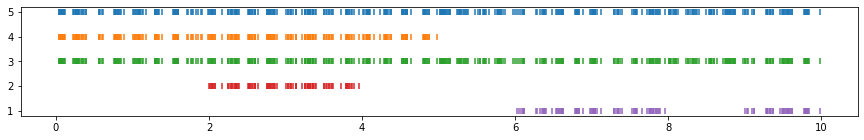

In [18]:
spike1 = Spike_train(name="no1",sampling_rate=20000)
spike1.generate_modulated_poisson_spike_train(rate_hz=50, sampling_rate=20000, 
                                              length_sec=10, modulation_hz = 4, modulation_depth = 1,
                                              min_rate_bins_per_cycle=10,phase_shift=0)

plt.figure(figsize=(15,2))

# intervals 0 to 10
spike1.set_intervals(np.array([[0,10]]))
plt.scatter(spike1.st,np.repeat(5,spike1.st.shape[0]),marker="|")

# intervals 0 to 5
spike1.set_intervals(np.array([[0,5]]))
plt.scatter(spike1.st,np.repeat(4,spike1.st.shape[0]),marker="|")

# unset previous intervals
print("unset intervals")
spike1.unset_intervals()
plt.scatter(spike1.st,np.repeat(3,spike1.st.shape[0]),marker="|")

# intervals from 2 to 4
spike1.set_intervals(np.array([[2,4]]))
plt.scatter(spike1.st,np.repeat(2,spike1.st.shape[0]),marker="|")

# intervals from 6 to 8 and 9 to 10
spike1.set_intervals(np.array([[6,8],[9,10]]))
plt.scatter(spike1.st,np.repeat(1,spike1.st.shape[0]),marker="|")

plt.show()